<a href="https://colab.research.google.com/github/DryBoss/plant-disease-model/blob/main/plant_disease_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage import io, color, segmentation
import matplotlib.pyplot as plt
import numpy as np

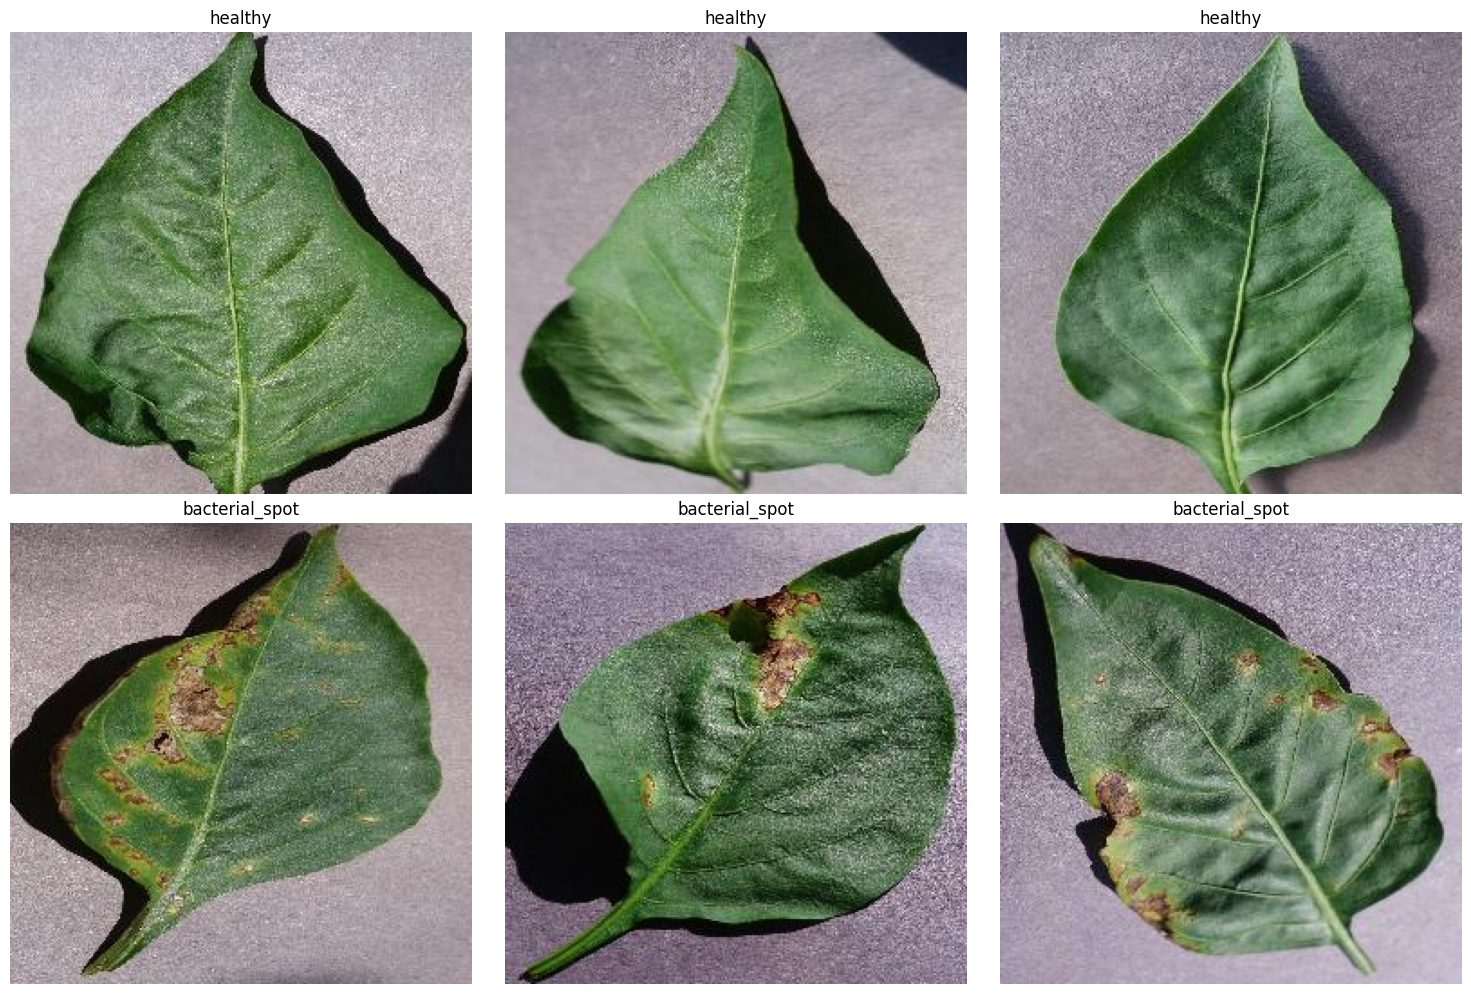

In [2]:
# Image categories and URLs
images_pepper_bell = {
    "healthy": [
        "https://raw.githubusercontent.com/DryBoss/plant-disease-model/0da6a8992060e92cf197a8a63d0e7ce03c60a266/data/pepper_bell_healthy/00100ffa-095e-4881-aebf-61fe5af7226e___JR_HL%207886.JPG",
        "https://raw.githubusercontent.com/DryBoss/plant-disease-model/0da6a8992060e92cf197a8a63d0e7ce03c60a266/data/pepper_bell_healthy/00208a93-7687-4e8c-b79e-3138687e0f38___JR_HL%207955.JPG",
        "https://raw.githubusercontent.com/DryBoss/plant-disease-model/0da6a8992060e92cf197a8a63d0e7ce03c60a266/data/pepper_bell_healthy/002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL%208068.JPG"
    ],
    "bacterial_spot": [
        "https://raw.githubusercontent.com/DryBoss/plant-disease-model/0da6a8992060e92cf197a8a63d0e7ce03c60a266/data/pepper_bell_bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot%208964.JPG",
        "https://raw.githubusercontent.com/DryBoss/plant-disease-model/0da6a8992060e92cf197a8a63d0e7ce03c60a266/data/pepper_bell_bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot%203395.JPG",
        "https://raw.githubusercontent.com/DryBoss/plant-disease-model/0da6a8992060e92cf197a8a63d0e7ce03c60a266/data/pepper_bell_bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot%203132.JPG"
    ]
}

# Flatten images and titles
all_images = [(io.imread(url), label) for label, urls in images_pepper_bell.items() for url in urls]

# Plot images
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for ax, (img, title) in zip(axes.flat, all_images):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

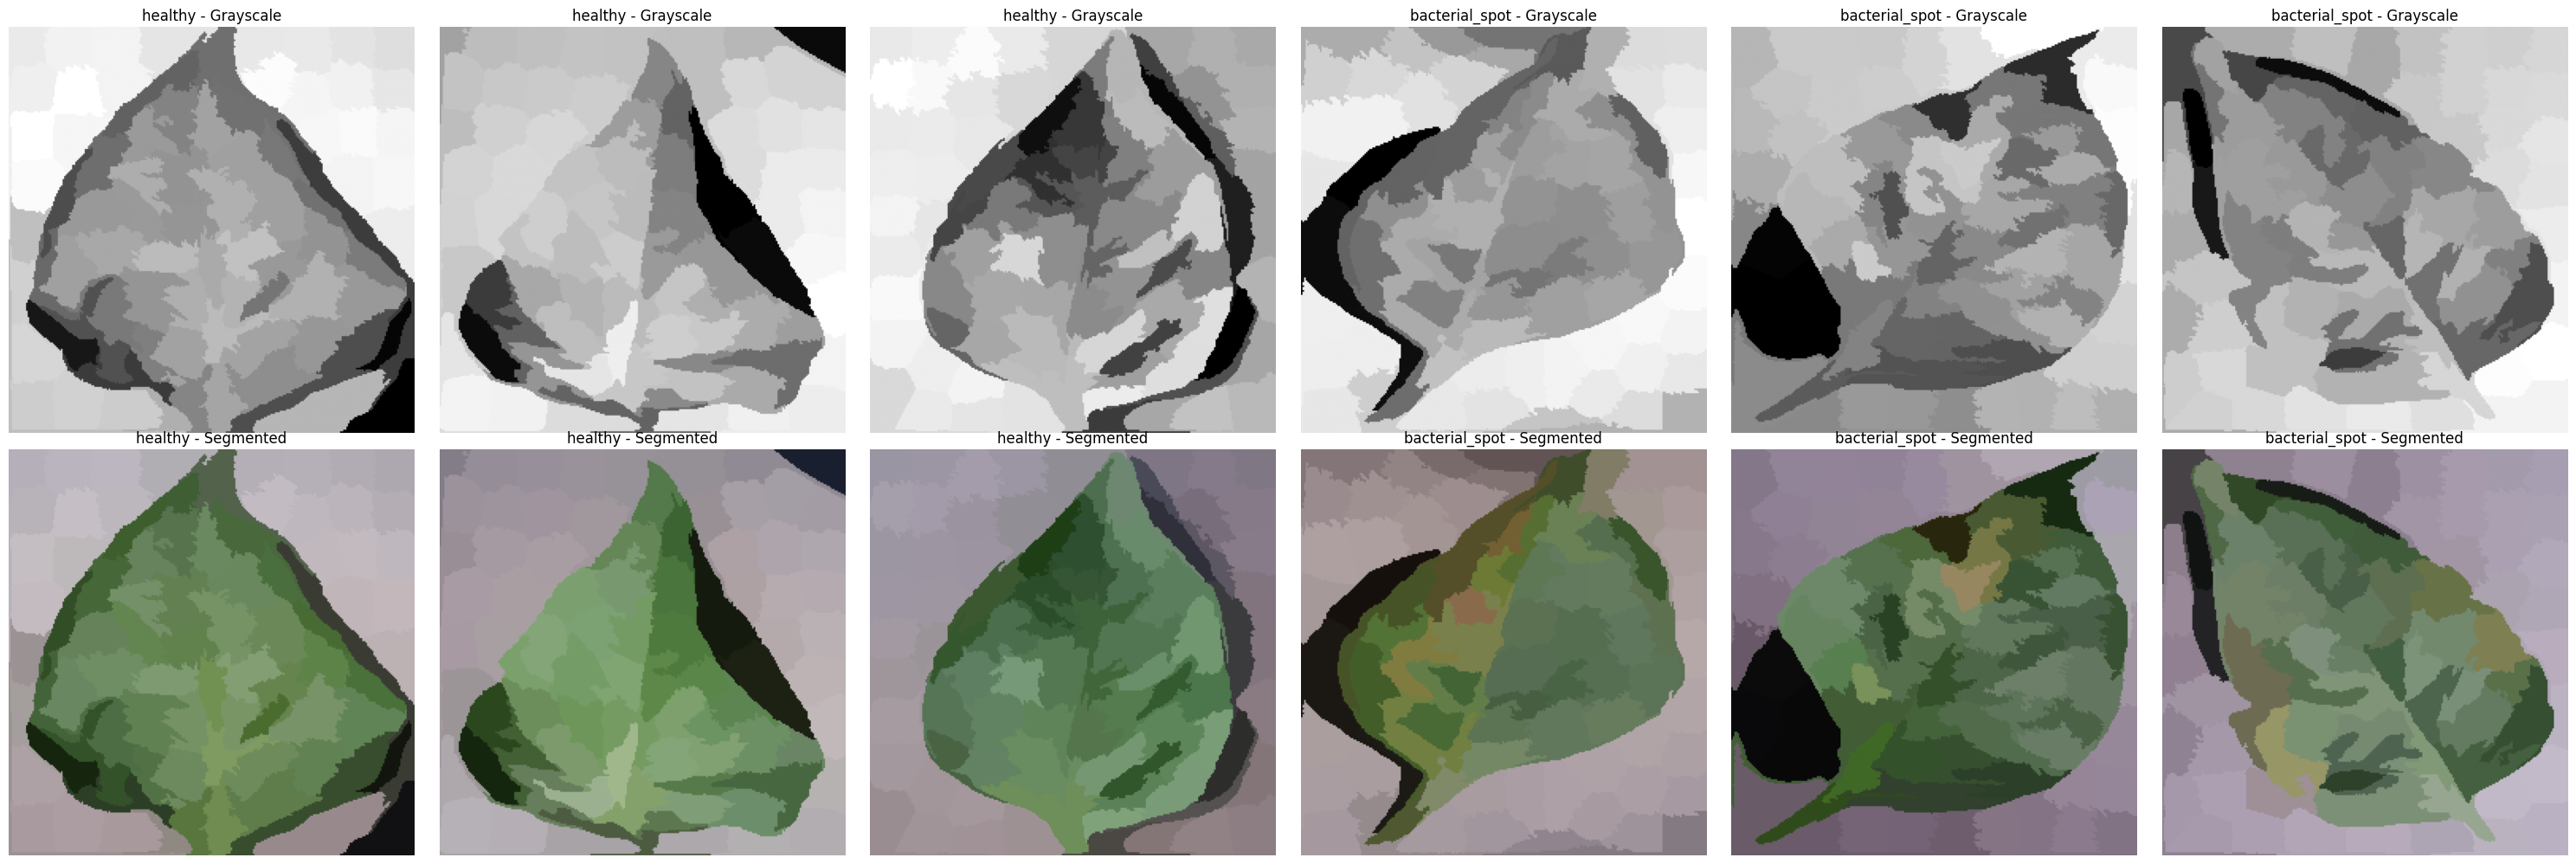

In [39]:
from skimage import io, color, segmentation
from skimage.restoration import denoise_bilateral
import matplotlib.pyplot as plt

# Stores
all_originals = []
all_segmented = []
all_grayscales = []
titles = []

for label, urls in images_pepper_bell.items():
    for url in urls:
        img = io.imread(url)

        # Denoise
        img_denoised = denoise_bilateral(img, channel_axis=-1)

        # Segmentation
        segments = segmentation.slic(img_denoised, n_segments=100)
        segmented_img = color.label2rgb(segments, img_denoised, kind='avg')

        # Grayscale
        img_gray = color.rgb2gray(segmented_img)

        # Save all results
        all_originals.append(img)
        all_segmented.append(segmented_img)
        all_grayscales.append(img_gray)
        titles.append(label)

# Plot
n = len(all_originals)
fig, axes = plt.subplots(nrows=2, ncols=n, figsize=(5 * n, 10))

for i in range(n):
    # Grayscale
    axes[0, i].imshow(all_grayscales[i], cmap='gray')
    axes[0, i].set_title(f"{titles[i]} - Grayscale")
    axes[0, i].axis('off')

    # Segmented
    axes[1, i].imshow(all_segmented[i])
    axes[1, i].set_title(f"{titles[i]} - Segmented")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()